# Supermart Grocery Sales - Retail Analytics Dataset
### Complete Exploratory Data Analysis, in the next notebook we'll do ML model Predictions


# SECTION 1: IMPORT LIBRARIES

In [8]:
"""
Installing and importing all necessary libraries for data analysis
"""

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


# SECTION 2: LOAD THE DATASET

In [9]:
"""
Loading the Supermart Grocery Sales dataset
"""

# Upload file in Colab
from google.colab import files
print("📁 Please upload your CSV file:")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(f"\n✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Display first few rows
print("\n📊 First 5 rows of the dataset:")
display(df.head())

# Display column information
print("\n📋 Dataset Columns:")
print(df.columns.tolist())

📁 Please upload your CSV file:


Saving Supermart_Sales_Dataset.csv to Supermart_Sales_Dataset.csv

✓ Dataset loaded successfully!
Dataset shape: 9,994 rows × 11 columns

📊 First 5 rows of the dataset:


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu



📋 Dataset Columns:
['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']


# SECTION 3: DATA QUALITY CHECK

In [10]:
"""
Checking data quality, missing values, and data types
"""

print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Basic info
print("\n📊 Dataset Information:")
df.info()

# Missing values
print("\n🔍 Missing Values Analysis:")
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing) > 0:
    display(missing)

    # Visualize missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing, x='Missing_Percentage', y='Column', palette='viridis')
    plt.title('Missing Values Percentage by Column', fontsize=16, fontweight='bold')
    plt.xlabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found!")

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate Rows: {duplicates}")

# Unique values
print("\n🔍 Unique Values Count:")
unique_df = pd.DataFrame({
    'Column': df.columns,
    'Unique_Values': df.nunique(),
    'Data_Type': df.dtypes
})
display(unique_df)


DATA QUALITY ASSESSMENT

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB

🔍 Missing Values Analysis:
✓ No missing values found!

🔍 Duplicate Rows: 0

🔍 Unique Values Count:


,Column,Unique_Values,Data_Type
Order ID,Order ID,9994,object
Customer Name,Customer Name,50,object
Category,Category,7,object
Sub Category,Sub Category,23,object
City,City,24,object
Order Date,Order Date,1236,object
Region,Region,5,object
Sales,Sales,1989,int64
Discount,Discount,26,float64
Profit,Profit,8380,float64


# SECTION 4: DATA CLEANING & PREPROCESSING

In [11]:
"""
Cleaning and preparing the data
"""

print("\n" + "="*80)
print("DATA CLEANING & PREPROCESSING")
print("="*80)

# Create a copy
df_clean = df.copy()

# Remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"✓ Removed {initial_rows - len(df_clean)} duplicate rows")

# Clean column names (remove spaces, standardize)
df_clean.columns = df_clean.columns.str.strip()

# Handle 'Order Date' column - convert to datetime
if 'Order Date' in df_clean.columns:
    # Replace ######### with NaT (missing dates)
    df_clean['Order Date'] = df_clean['Order Date'].replace('#########', np.nan)

    # Try multiple date formats
    date_formats = ['%m/%d/%Y', '%d/%m/%Y', '%Y-%m-%d', '%m-%d-%Y']

    for date_format in date_formats:
        try:
            df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], format=date_format, errors='coerce')
            if df_clean['Order Date'].notna().sum() > 0:
                print(f"✓ Successfully parsed dates with format: {date_format}")
                break
        except:
            continue

    # If still not parsed, try automatic parsing
    if df_clean['Order Date'].isna().all():
        df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')

    print(f"✓ Converted 'Order Date' to datetime format")
    print(f"   Valid dates: {df_clean['Order Date'].notna().sum():,}")
    print(f"   Invalid dates: {df_clean['Order Date'].isna().sum():,}")

# Strip whitespace from string columns
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()

print(f"\n✓ Data cleaning completed!")
print(f"Final dataset shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")



DATA CLEANING & PREPROCESSING
✓ Removed 0 duplicate rows
✓ Successfully parsed dates with format: %m/%d/%Y
✓ Converted 'Order Date' to datetime format
   Valid dates: 5,952
   Invalid dates: 4,042

✓ Data cleaning completed!
Final dataset shape: 9,994 rows × 11 columns


# SECTION 5: DATA CLEANING & PREPROCESSING

In [6]:
print("\n" + "="*80)
print("DATA CLEANING & PREPROCESSING")
print("="*80)

# Create a copy for cleaning
df_clean = df.copy()

# Remove duplicates if any
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"✓ Removed {initial_rows - len(df_clean)} duplicate rows")

# Handle missing values (strategy depends on your dataset)
# Example: Fill numerical with median, categorical with mode
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['int64', 'float64']:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print(f"✓ Handled missing values")

# Convert date columns to datetime (if present)
date_columns = [col for col in df_clean.columns if 'date' in col.lower() or 'Date' in col]
for col in date_columns:
    try:
        df_clean[col] = pd.to_datetime(df_clean[col])
        print(f"✓ Converted '{col}' to datetime format")
    except:
        print(f"⚠ Could not convert '{col}' to datetime")

# Strip whitespace from string columns
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()

print(f"\n✓ Data cleaning completed!")
print(f"Final dataset shape: {df_clean.shape}")


DATA CLEANING & PREPROCESSING
✓ Removed 0 duplicate rows
✓ Handled missing values
⚠ Could not convert 'Order Date' to datetime

✓ Data cleaning completed!
Final dataset shape: (9994, 11)


# SECTION 6: FEATURE ENGINEERING

In [12]:
"""
Creating new features for enhanced analysis
"""

print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)

# Date-based features
if 'Order Date' in df_clean.columns and df_clean['Order Date'].notna().sum() > 0:
    df_clean['Year'] = df_clean['Order Date'].dt.year
    df_clean['Month'] = df_clean['Order Date'].dt.month
    df_clean['Month_Name'] = df_clean['Order Date'].dt.month_name()
    df_clean['Quarter'] = df_clean['Order Date'].dt.quarter
    df_clean['Day'] = df_clean['Order Date'].dt.day
    df_clean['DayOfWeek'] = df_clean['Order Date'].dt.dayofweek
    df_clean['DayOfWeek_Name'] = df_clean['Order Date'].dt.day_name()
    df_clean['Week'] = df_clean['Order Date'].dt.isocalendar().week
    df_clean['Is_Weekend'] = df_clean['DayOfWeek'].isin([5, 6]).astype(int)
    print("✓ Created date-based features")

# Sales categories
if 'Sales' in df_clean.columns:
    df_clean['Sales_Category'] = pd.cut(
        df_clean['Sales'],
        bins=[0, df_clean['Sales'].quantile(0.33),
              df_clean['Sales'].quantile(0.66),
              df_clean['Sales'].max()],
        labels=['Low', 'Medium', 'High']
    )
    print("✓ Created 'Sales_Category' feature")

# Profit margin
if 'Profit' in df_clean.columns and 'Sales' in df_clean.columns:
    df_clean['Profit_Margin'] = (df_clean['Profit'] / df_clean['Sales'] * 100).round(2)
    print("✓ Created 'Profit_Margin' feature")

# Discount category
if 'Discount' in df_clean.columns:
    df_clean['Discount_Category'] = pd.cut(
        df_clean['Discount'],
        bins=[0, 0.1, 0.2, 1.0],
        labels=['Low Discount', 'Medium Discount', 'High Discount']
    )
    print("✓ Created 'Discount_Category' feature")

print(f"\n✓ Feature engineering completed!")

# Show sample with new features
print("\n📊 Sample data with new features:")
display(df_clean.head())




FEATURE ENGINEERING
✓ Created date-based features
✓ Created 'Sales_Category' feature
✓ Created 'Profit_Margin' feature
✓ Created 'Discount_Category' feature

✓ Feature engineering completed!

📊 Sample data with new features:


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,...,Month_Name,Quarter,Day,DayOfWeek,DayOfWeek_Name,Week,Is_Weekend,Sales_Category,Profit_Margin,Discount_Category
0,OD1,Harish,Oil & Masala,Masalas,Vellore,NaT,North,1254,0.12,401.28,...,NaN,NaN,NaN,NaN,NaN,<NA>,0,Medium,32.0,Medium Discount
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,NaT,South,749,0.18,149.80,...,NaN,NaN,NaN,NaN,NaN,<NA>,0,Low,20.0,Medium Discount
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,NaT,West,2360,0.21,165.20,...,NaN,NaN,NaN,NaN,NaN,<NA>,0,High,7.0,High Discount
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,NaT,South,896,0.25,89.60,...,NaN,NaN,NaN,NaN,NaN,<NA>,0,Low,10.0,High Discount
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,NaT,South,2355,0.26,918.45,...,NaN,NaN,NaN,NaN,NaN,<NA>,0,High,39.0,High Discount


# SECTION 6: STATISTICAL SUMMARY

In [13]:
"""
Comprehensive statistical overview
"""

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

# Numerical summary
print("\n📈 Numerical Variables Summary:")
numerical_cols = ['Sales', 'Discount', 'Profit']
display(df_clean[numerical_cols].describe())

# Categorical summary
print("\n📊 Categorical Variables Summary:")
categorical_cols = ['Category', 'Sub Category', 'Region', 'State']
for col in categorical_cols:
    if col in df_clean.columns:
        print(f"\n{col}:")
        print(df_clean[col].value_counts().head())


STATISTICAL SUMMARY

📈 Numerical Variables Summary:


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000



📊 Categorical Variables Summary:

Category:
Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Name: count, dtype: int64

Sub Category:
Sub Category
Health Drinks    719
Soft Drinks      681
Cookies          520
Breads & Buns    502
Chocolates       499
Name: count, dtype: int64

Region:
Region
West       3203
East       2848
Central    2323
South      1619
North         1
Name: count, dtype: int64

State:
State
Tamil Nadu    9994
Name: count, dtype: int64


# SECTION 7: KEY VISUALIZATIONS


CREATING KEY VISUALIZATIONS

📊 Visualization 1: Sales Distribution


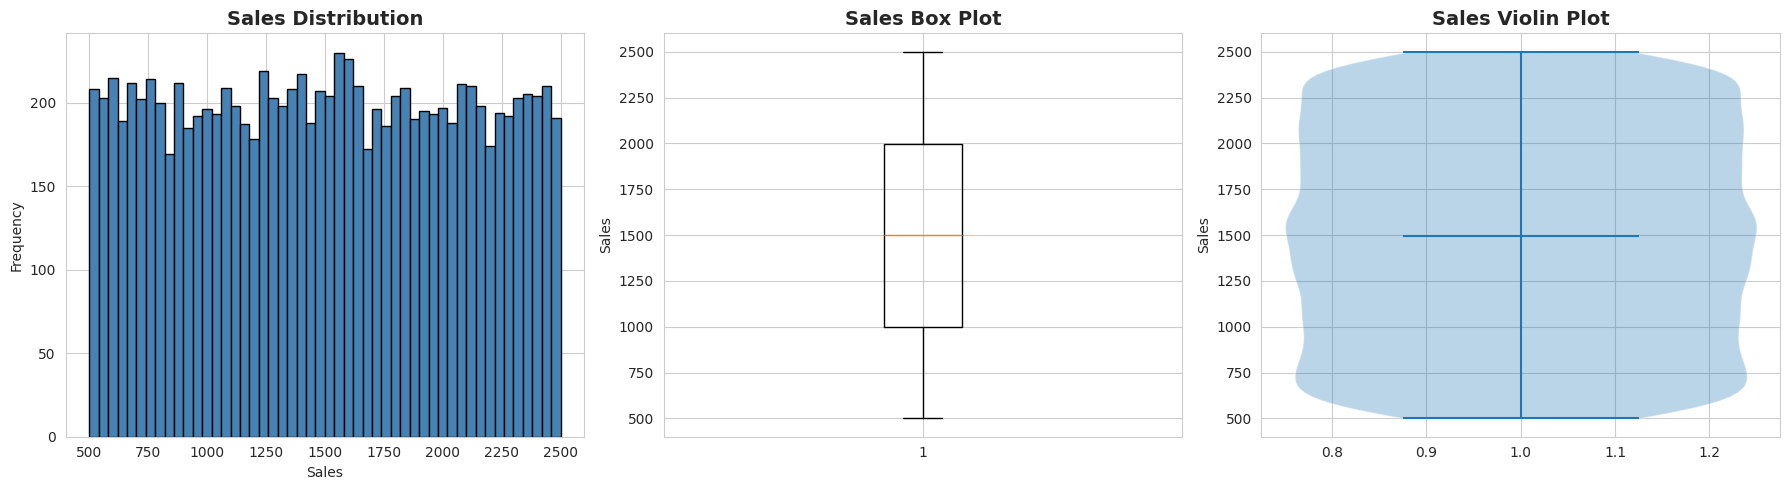


📊 Visualization 2: Sales by Category



📊 Visualization 3: Sales by Region



📊 Visualization 4: Top 10 Sub-Categories



📊 Visualization 5: Sales vs Profit Relationship



📊 Visualization 6: Sales Trend Over Time



📊 Visualization 7: Correlation Analysis


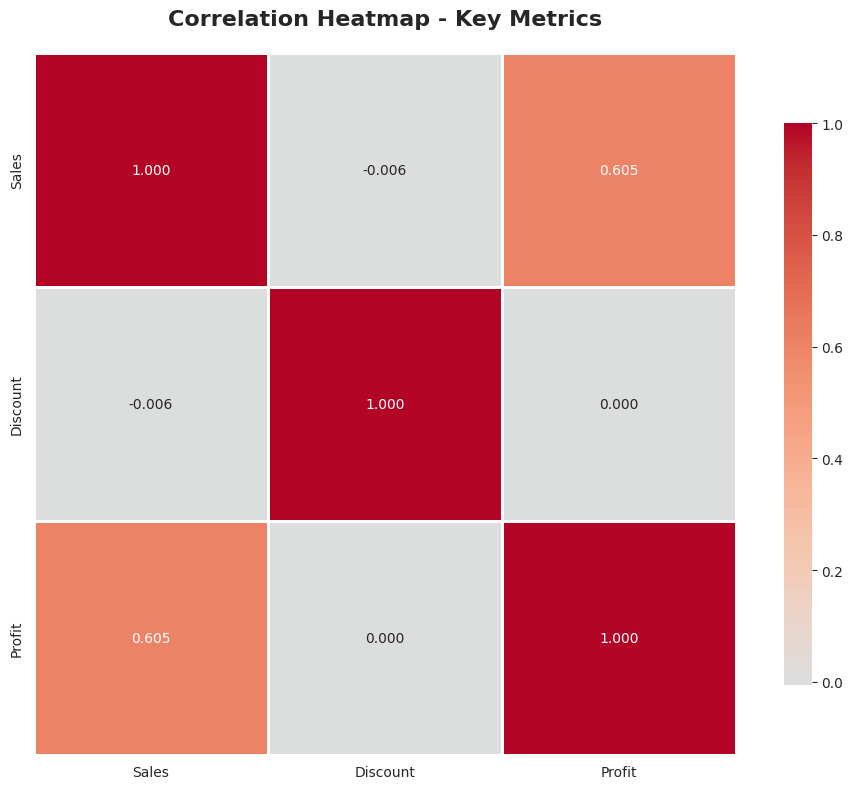


📊 Visualization 8: Discount Impact on Sales & Profit



📊 Visualization 9: Regional Performance Analysis



📊 Visualization 10: Sales by Day of Week


In [14]:
"""
Creating insightful visualizations
"""

print("\n" + "="*80)
print("CREATING KEY VISUALIZATIONS")
print("="*80)

# 1. Sales Distribution
print("\n📊 Visualization 1: Sales Distribution")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df_clean['Sales'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_title('Sales Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_clean['Sales'], vert=True)
axes[1].set_title('Sales Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sales')

# Violin plot
parts = axes[2].violinplot([df_clean['Sales'].dropna()], vert=True, showmeans=True)
axes[2].set_title('Sales Violin Plot', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

# 2. Sales by Category
print("\n📊 Visualization 2: Sales by Category")
category_sales = df_clean.groupby('Category')['Sales'].sum().sort_values(ascending=False)

fig = px.bar(
    x=category_sales.index,
    y=category_sales.values,
    labels={'x': 'Category', 'y': 'Total Sales'},
    title='Total Sales by Category',
    color=category_sales.values,
    color_continuous_scale='viridis'
)
fig.update_layout(height=500, showlegend=False)
fig.show()

# 3. Sales by Region
print("\n📊 Visualization 3: Sales by Region")
region_sales = df_clean.groupby('Region')['Sales'].sum().sort_values(ascending=False)

fig = px.pie(
    values=region_sales.values,
    names=region_sales.index,
    title='Sales Distribution by Region',
    hole=0.4
)
fig.update_layout(height=500)
fig.show()

# 4. Top 10 Sub-Categories
print("\n📊 Visualization 4: Top 10 Sub-Categories")
subcat_sales = df_clean.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)

fig = px.bar(
    x=subcat_sales.values,
    y=subcat_sales.index,
    orientation='h',
    labels={'x': 'Total Sales', 'y': 'Sub Category'},
    title='Top 10 Sub-Categories by Sales',
    color=subcat_sales.values,
    color_continuous_scale='blues'
)
fig.update_layout(height=600)
fig.show()

# 5. Sales vs Profit Scatter
print("\n📊 Visualization 5: Sales vs Profit Relationship")
fig = px.scatter(
    df_clean.sample(min(5000, len(df_clean))),
    x='Sales',
    y='Profit',
    color='Category',
    size='Discount',
    hover_data=['Region', 'Sub Category'],
    title='Sales vs Profit Analysis',
    trendline='ols',
    opacity=0.6
)
fig.update_layout(height=600)
fig.show()

# 6. Time Series Analysis (if dates available)
if 'Order Date' in df_clean.columns and df_clean['Order Date'].notna().sum() > 0:
    print("\n📊 Visualization 6: Sales Trend Over Time")

    # Monthly sales trend
    monthly_sales = df_clean.groupby(df_clean['Order Date'].dt.to_period('M'))['Sales'].sum()
    monthly_sales.index = monthly_sales.index.to_timestamp()

    fig = px.line(
        x=monthly_sales.index,
        y=monthly_sales.values,
        labels={'x': 'Date', 'y': 'Total Sales'},
        title='Monthly Sales Trend'
    )
    fig.update_traces(line_color='#2196F3', line_width=3)
    fig.update_layout(height=500)
    fig.show()

# 7. Correlation Heatmap
print("\n📊 Visualization 7: Correlation Analysis")
corr_cols = ['Sales', 'Discount', 'Profit']
correlation_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=2,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap - Key Metrics', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 8. Discount Impact Analysis
print("\n📊 Visualization 8: Discount Impact on Sales & Profit")
if 'Discount_Category' in df_clean.columns:
    discount_impact = df_clean.groupby('Discount_Category').agg({
        'Sales': 'mean',
        'Profit': 'mean'
    }).round(2)

    fig = go.Figure(data=[
        go.Bar(name='Avg Sales', x=discount_impact.index, y=discount_impact['Sales'], marker_color='lightblue'),
        go.Bar(name='Avg Profit', x=discount_impact.index, y=discount_impact['Profit'], marker_color='lightcoral')
    ])
    fig.update_layout(
        title='Average Sales & Profit by Discount Category',
        xaxis_title='Discount Category',
        yaxis_title='Amount ($)',
        barmode='group',
        height=500
    )
    fig.show()

# 9. Regional Performance
print("\n📊 Visualization 9: Regional Performance Analysis")
regional_perf = df_clean.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)
regional_perf.columns = ['Total Sales', 'Total Profit', 'Order Count']

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Total Sales', 'Total Profit', 'Order Count'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}, {'type': 'bar'}]]
)

fig.add_trace(
    go.Bar(x=regional_perf.index, y=regional_perf['Total Sales'], marker_color='steelblue'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=regional_perf.index, y=regional_perf['Total Profit'], marker_color='coral'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=regional_perf.index, y=regional_perf['Order Count'], marker_color='lightgreen'),
    row=1, col=3
)

fig.update_layout(height=500, showlegend=False, title_text="Regional Performance Dashboard")
fig.show()

# 10. Day of Week Analysis
if 'DayOfWeek_Name' in df_clean.columns:
    print("\n📊 Visualization 10: Sales by Day of Week")

    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_sales = df_clean.groupby('DayOfWeek_Name')['Sales'].sum().reindex(dow_order)

    fig = px.bar(
        x=dow_sales.index,
        y=dow_sales.values,
        labels={'x': 'Day of Week', 'y': 'Total Sales'},
        title='Sales Distribution by Day of Week',
        color=dow_sales.values,
        color_continuous_scale='viridis'
    )
    fig.update_layout(height=500)
    fig.show()

# SECTION 8: KEY INSIGHTS SUMMARY

In [15]:
"""
Generating key insights from the analysis
"""

print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Total Records: {len(df_clean):,}")
print(f"  • Date Range: {df_clean['Order Date'].min()} to {df_clean['Order Date'].max()}" if 'Order Date' in df_clean.columns else "")
print(f"  • Unique Customers: {df_clean['Customer Name'].nunique():,}" if 'Customer Name' in df_clean.columns else "")
print(f"  • Total Categories: {df_clean['Category'].nunique()}" if 'Category' in df_clean.columns else "")

print("\n💰 SALES METRICS:")
print(f"  • Total Sales: ${df_clean['Sales'].sum():,.2f}")
print(f"  • Average Order Value: ${df_clean['Sales'].mean():,.2f}")
print(f"  • Median Order Value: ${df_clean['Sales'].median():,.2f}")
print(f"  • Max Order Value: ${df_clean['Sales'].max():,.2f}")

print("\n💵 PROFIT METRICS:")
print(f"  • Total Profit: ${df_clean['Profit'].sum():,.2f}")
print(f"  • Average Profit per Order: ${df_clean['Profit'].mean():,.2f}")
print(f"  • Overall Profit Margin: {(df_clean['Profit'].sum() / df_clean['Sales'].sum() * 100):.2f}%")

print("\n🎯 TOP PERFORMERS:")
print(f"\n  Top 3 Categories by Sales:")
top_categories = df_clean.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(3)
for i, (cat, sales) in enumerate(top_categories.items(), 1):
    print(f"    {i}. {cat}: ${sales:,.2f}")

print(f"\n  Top 3 Regions by Sales:")
top_regions = df_clean.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(3)
for i, (region, sales) in enumerate(top_regions.items(), 1):
    print(f"    {i}. {region}: ${sales:,.2f}")

print(f"\n  Top 5 States by Sales:")
top_states = df_clean.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)
for i, (state, sales) in enumerate(top_states.items(), 1):
    print(f"    {i}. {state}: ${sales:,.2f}")



KEY INSIGHTS SUMMARY

📊 DATASET OVERVIEW:
  • Total Records: 9,994
  • Date Range: 2015-01-13 00:00:00 to 2018-12-30 00:00:00
  • Unique Customers: 50
  • Total Categories: 7

💰 SALES METRICS:
  • Total Sales: $14,956,982.00
  • Average Order Value: $1,496.60
  • Median Order Value: $1,498.00
  • Max Order Value: $2,500.00

💵 PROFIT METRICS:
  • Total Profit: $3,747,121.20
  • Average Profit per Order: $374.94
  • Overall Profit Margin: 25.05%

🎯 TOP PERFORMERS:

  Top 3 Categories by Sales:
    1. Eggs, Meat & Fish: $2,267,401.00
    2. Snacks: $2,237,546.00
    3. Food Grains: $2,115,272.00

  Top 3 Regions by Sales:
    1. West: $4,798,743.00
    2. East: $4,248,368.00
    3. Central: $3,468,156.00

  Top 5 States by Sales:
    1. Tamil Nadu: $14,956,982.00
